## Affair Classification using Logistic Regression



### Introduction About The Data:

The goal is to predict the classification for `affair` using Logistic Regression.

The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.

The dataset contains 6366 observations of 9 variables:

Independent variables:
* `rate_marriage`: woman's rating of her marriage (1 = very poor, 5 = very good)
* `age`: woman's age
* `yrs_married`: number of years married
* `children`: number of children
* `religious`: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
* `educ`: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
* `occupation`: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
* `occupation_husb`: husband's occupation (same coding as above)
* `affairs`: time spent in extra-marital affairs

Target variable:
* Add `affair` column: 1 represents having affairs (considering affairs > 0), 0 represents having no affairs (considering affairs <= 0)

Fetch Data from Statsmodels Python Module:
import statsmodels.api as sm
df = sm.datasets.fair.load_pandas().data

In [205]:
import pandas as pd

In [170]:
## Data Ingestions step
df = pd.read_csv('data/affair.csv')
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [171]:
## Check data shape
df.shape

(6366, 9)

In [172]:
## Check null values
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [ ]:
### No missing values present in the data

In [173]:
## Add "affair" column: 1 -> represents having affairs, 0 -> represents not having affairs
df['affair'] = (df.affairs > 0).astype(int)  # converting into binary features
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [174]:
## Check whether the dataset is balanced or not
print(df[df["affair"]==0].shape)
print(df[df["affair"]==1].shape)


(4313, 10)
(2053, 10)


In [175]:
## Statistical Description of data
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [177]:
## check for duplicated records
df.duplicated().sum()

1039

In [178]:
## segregate numerical and categorical columns

numerical_columns = df.columns[df.dtypes!='object']
categorical_columns = df.columns[df.dtypes=='object']

print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


In [160]:
## Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_barplot(df, col_name=None, sns_color="coolwarm"):
    f_count = df[col_name].value_counts().sort_values(ascending=False).to_frame()
    f_count = f_count.rename(columns={col_name: 'count'})

    n = f_count.shape[0]
    nl = [i for i in range(n)]
    cplt = np.array(sns.color_palette(sns_color, n)).take(nl, axis=0)

    ax = sns.barplot(x=f_count.index, y='count', data=f_count, palette=cplt)

    for p in ax.patches:
        ax.annotate(
            format(p.get_height()),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0,9),
            textcoords='offset points'
        )
    return


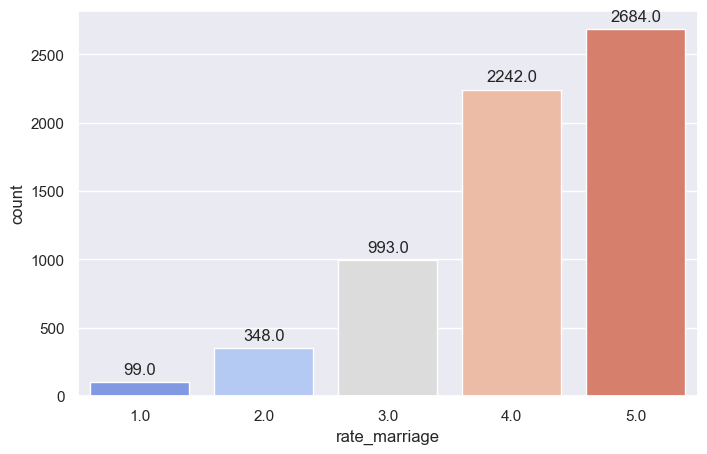

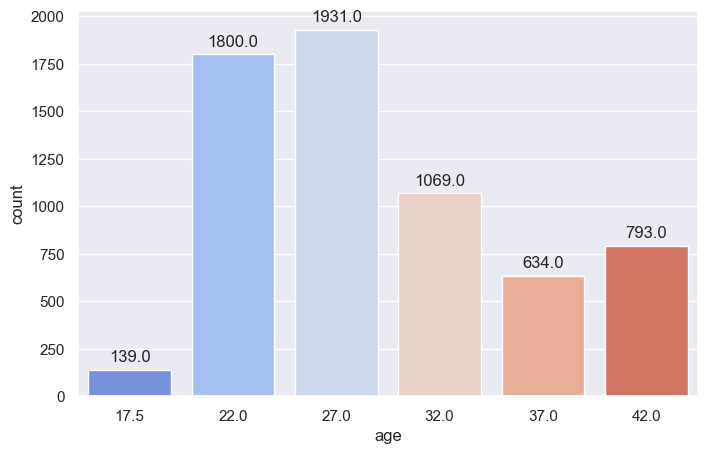

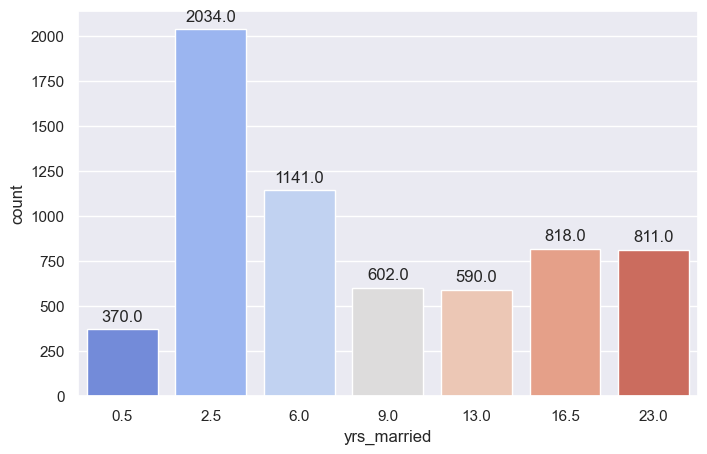

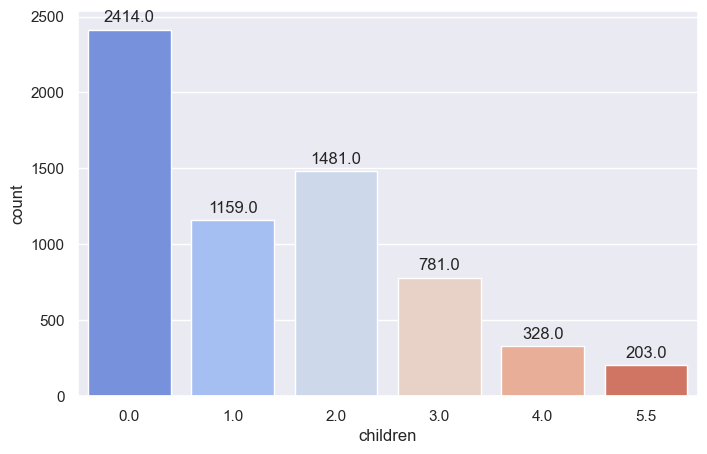

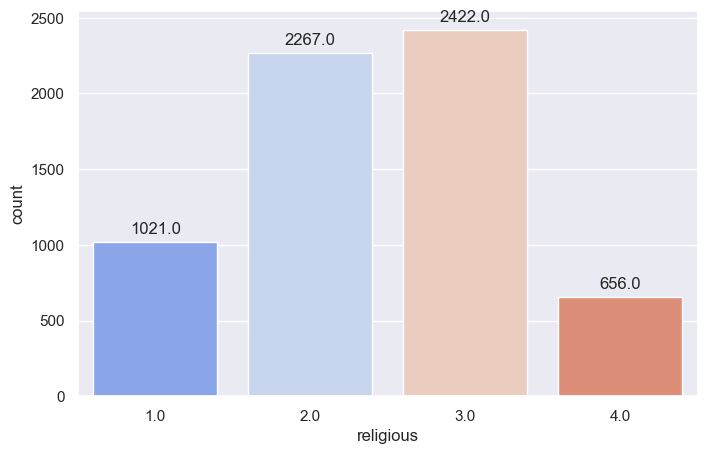

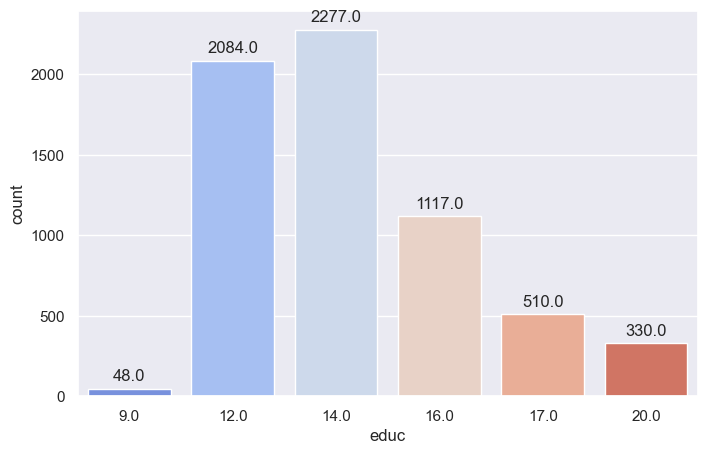

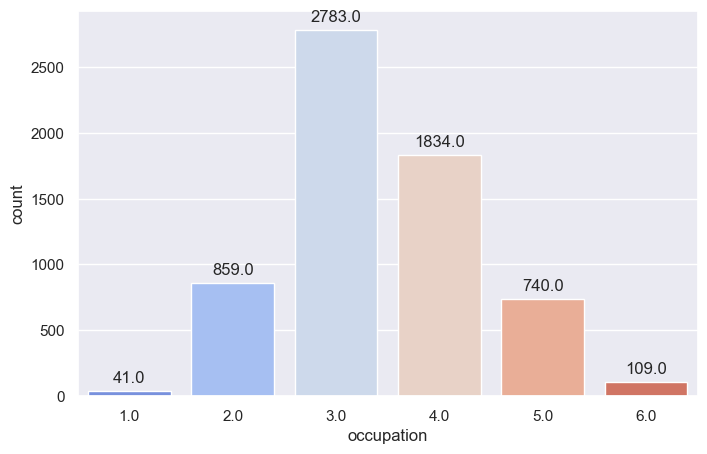

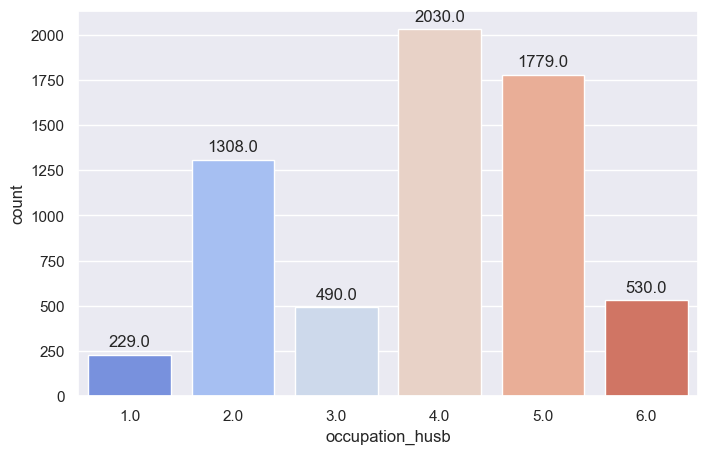

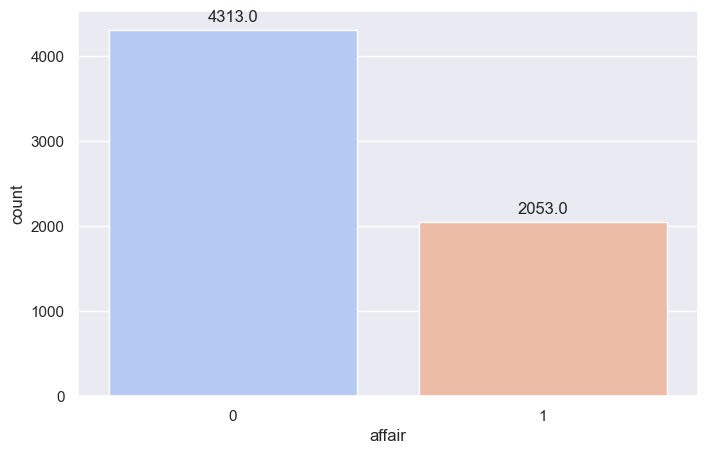

In [182]:
# visualize rate_marriage barplot
n_columns = ['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'occupation', 'occupation_husb', 'affair']
for col in n_columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel=col, ylabel='count')
    create_barplot(df, col_name=col)

In [183]:
df.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [ ]:
def create_countplot(df, x_col=None, y_col="affair", txt_msg=None):
    plt.figure(figsize=(8,6))
    sns.set_style("darkgrid")
    sns.countplot(data=df, x=x_col, hue=y_col)
    plt.title(txt_msg)
    plt.show()
    return

<Figure size 800x500 with 0 Axes>

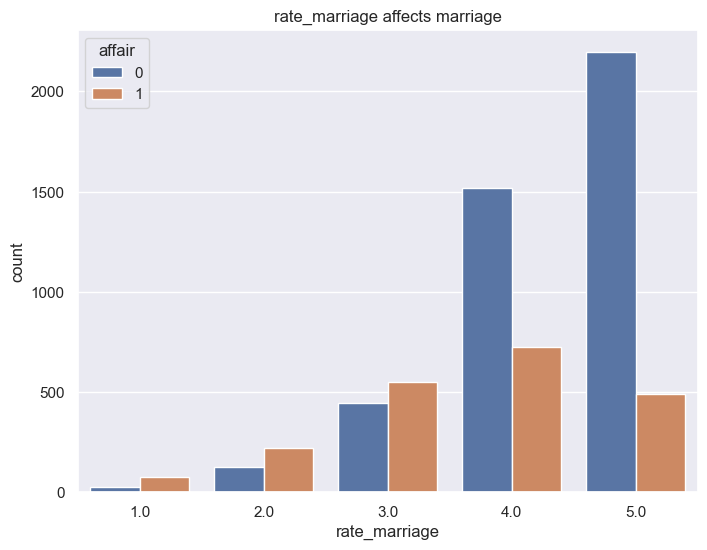

<Figure size 800x500 with 0 Axes>

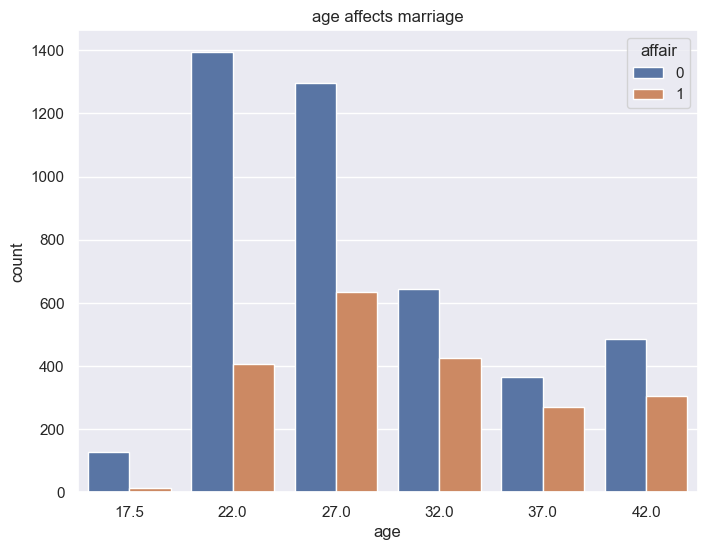

<Figure size 800x500 with 0 Axes>

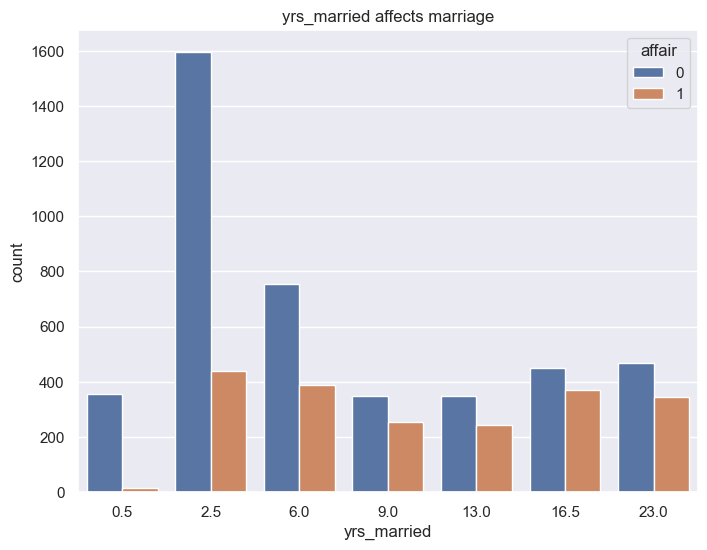

<Figure size 800x500 with 0 Axes>

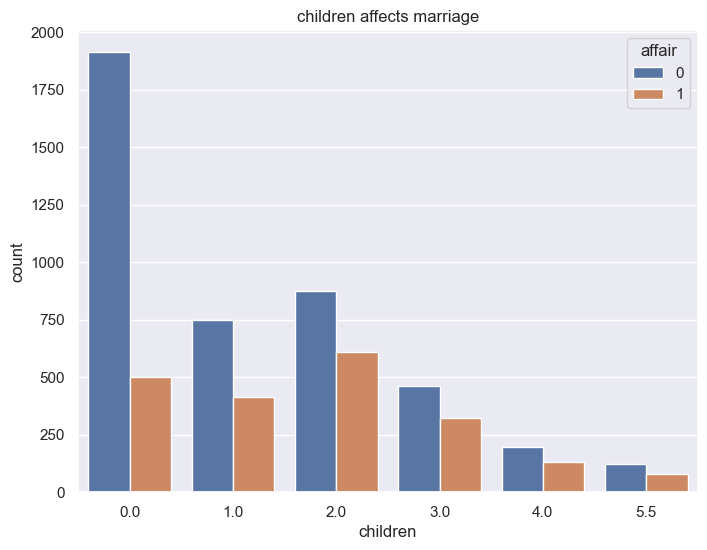

<Figure size 800x500 with 0 Axes>

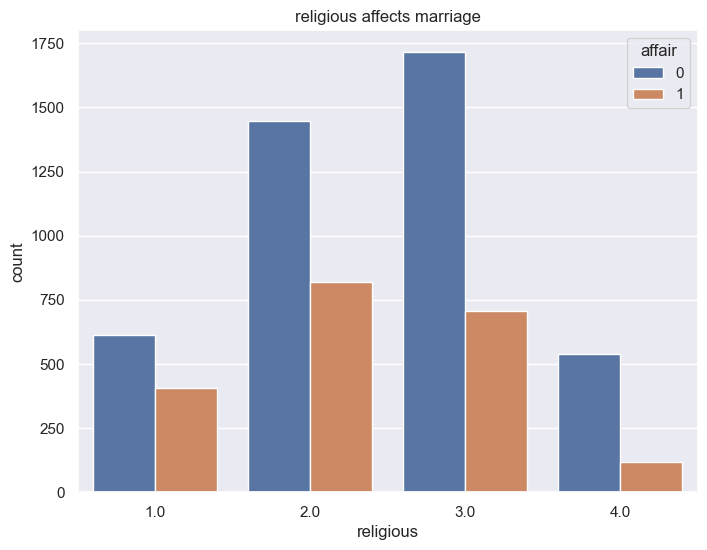

<Figure size 800x500 with 0 Axes>

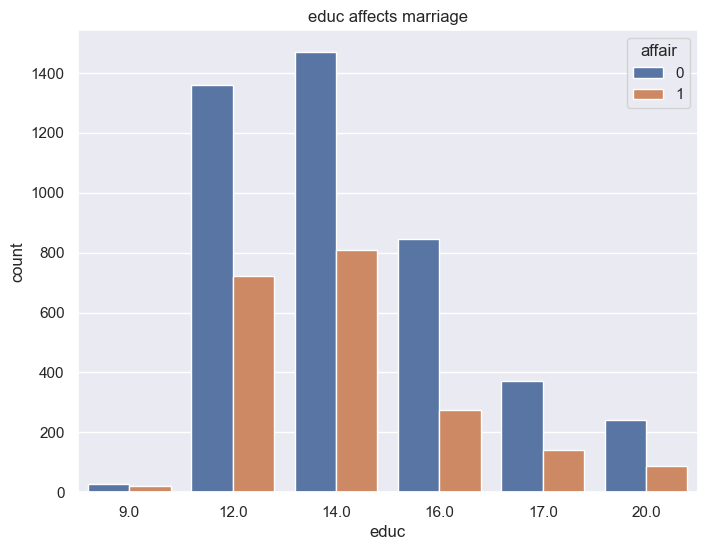

<Figure size 800x500 with 0 Axes>

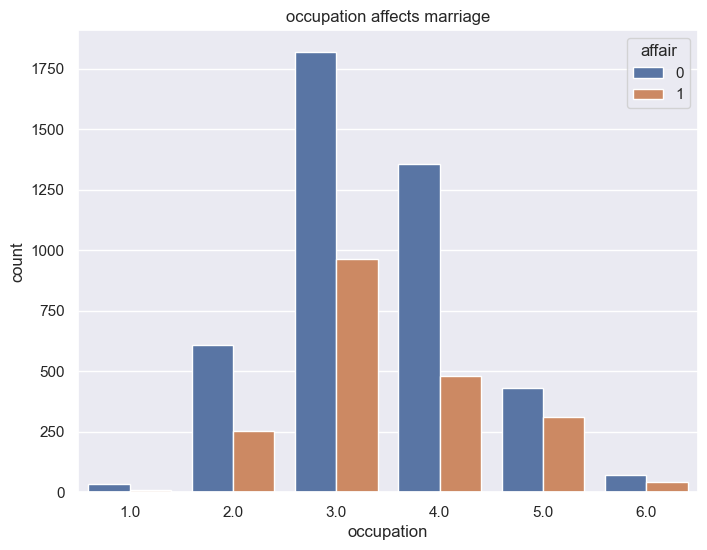

<Figure size 800x500 with 0 Axes>

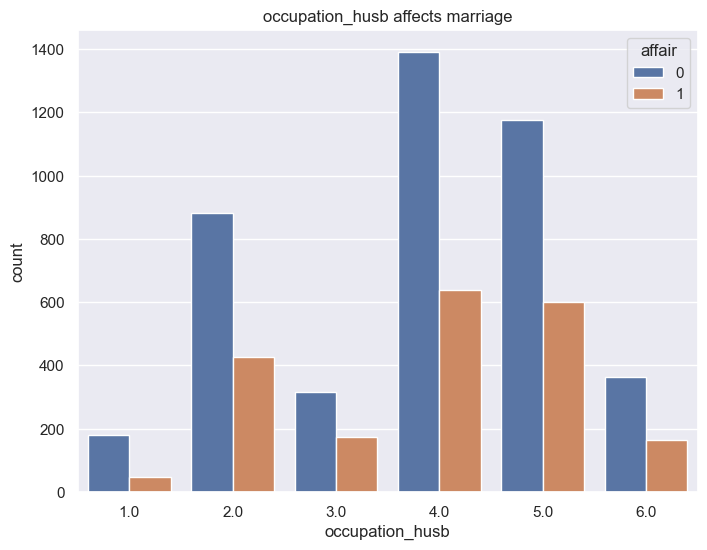

In [213]:
n_columns = ['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'occupation', 'occupation_husb']
for col in n_columns:
    plt.figure()
    plt.tight_layout()
    create_countplot(df, x_col=col, txt_msg=col+' affects marriage')

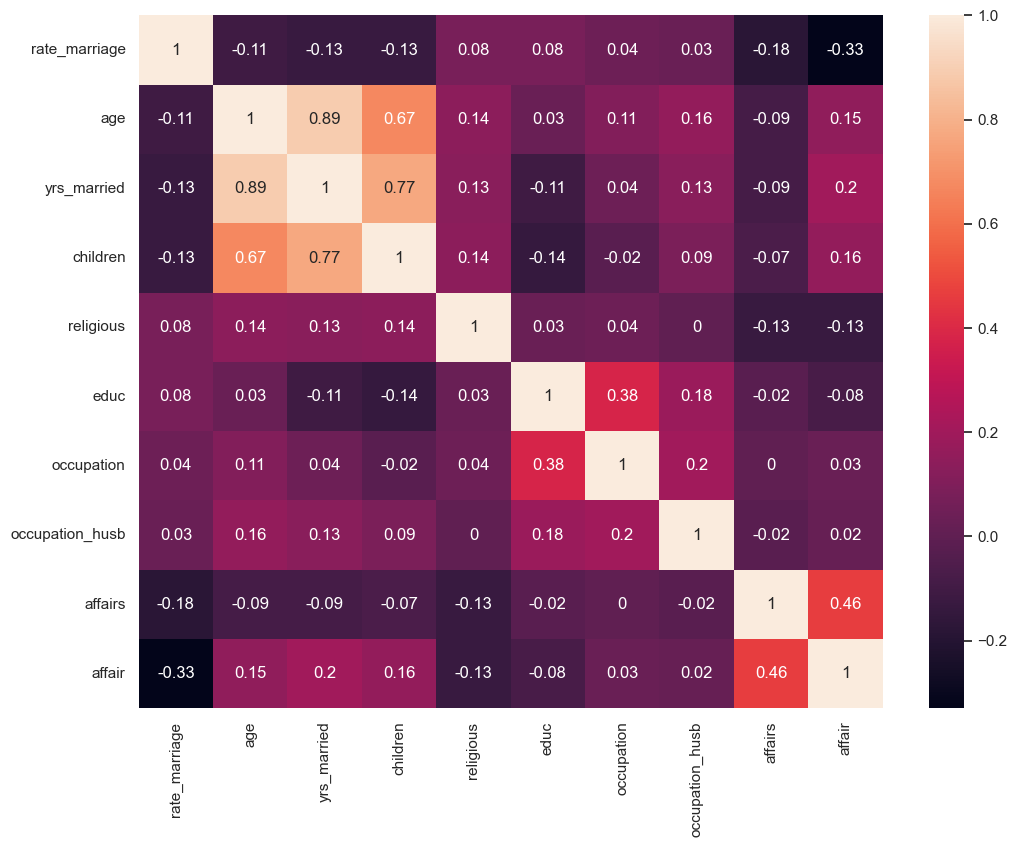

In [204]:
## correlation
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
## Correlation status

# intercorrelation observed for following features: 

# 1) age vs yrs_married, children -> 0.89, 0.67
# 2) yrs_married vs children -> 0.77